Importing all the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import seaborn as sns
import logging

In [ ]:
#loading dataset using pandas

In [ ]:
credit_card_data=pd.read_csv('/content/creditcard.csv')

In [ ]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Removing rows where values are NaN

In [ ]:
credit_card_data.dropna(inplace=True)

In [ ]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
print("Missing values after dropping NaNs:")
credit_card_data.isnull()

Missing values after dropping NaNs:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [ ]:
legit=credit_card_data[credit_card_data.Class==0]
fraud=credit_card_data[credit_card_data.Class==1]

In [ ]:
print("Legitimate transactions statistics:")
print(legit.Amount.describe())
print("\nFraudulent transactions statistics:")
print(fraud.Amount.describe())

Legitimate transactions statistics:
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Fraudulent transactions statistics:
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [ ]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [ ]:
n = len(fraud)
print(f'The value of n is: {n}')

The value of n is: 492


In [ ]:
legit_sample=legit.sample(n)

In [ ]:
new_dataset=pd.concat([legit_sample,fraud],axis=0)

In [ ]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,92369.483740,0.175591,-0.038237,0.064210,-0.076332,-0.009602,-0.031596,-0.046101,-0.017347,-0.007848,...,-0.017748,0.040185,-0.023647,0.007690,0.010081,0.002322,-0.000980,0.000178,-0.008473,74.791667
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [ ]:
x=new_dataset.drop(columns='Class',axis=1)
y=new_dataset['Class']

In [ ]:
print(x)

            Time        V1        V2        V3        V4        V5        V6  \
173799  121644.0 -0.544543 -0.202110  1.167932 -2.332137 -0.124706 -0.374681   
56784    47593.0  1.451124 -0.938381  0.567686 -1.299322 -1.464298 -0.731632   
165278  117320.0  1.998473  0.504665 -2.320116  0.689423  0.495193 -1.553344   
10259    16091.0 -0.731467  0.210683  2.122591  1.684345 -0.329549  1.702832   
96911    66001.0 -0.751371  0.045843  0.606099 -1.125344  2.075276  3.758593   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [ ]:
print(y)

173799    0
56784     0
165278    0
10259     0
96911     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [ ]:
model=LogisticRegression(random_state=2)

In [ ]:
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=2)

In [ ]:
y_train_pred = model.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training accuracy: {train_accuracy:.4f}")


Training accuracy: 0.9504


In [ ]:
y_test_pred = model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test accuracy: {test_accuracy:.4f}")

Test accuracy: 0.9188


In [ ]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))



Confusion Matrix:
[[96  3]
 [13 85]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        99
           1       0.97      0.87      0.91        98

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197



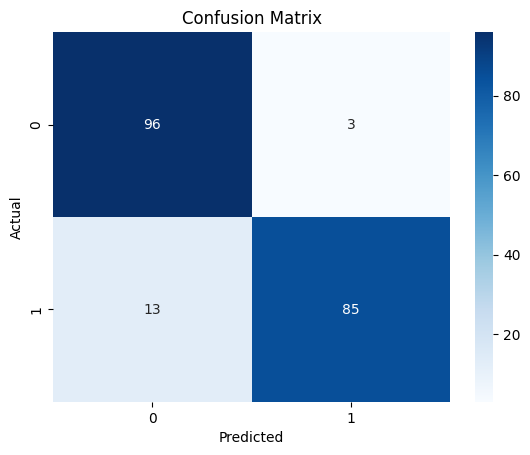

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
y_test_pred_proba = model.predict_proba(x_test)[:, 1]

In [ ]:
threshold = 0.5  # Adjust this threshold as needed
y_test_pred_adjusted = (y_test_pred_proba >= threshold).astype(int)

In [ ]:
print("\nAdjusted Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_adjusted))
print("\nAdjusted Classification Report:")
print(classification_report(y_test, y_test_pred_adjusted))


Adjusted Confusion Matrix:
[[96  3]
 [13 85]]

Adjusted Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        99
           1       0.97      0.87      0.91        98

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197



In [ ]:
logging.basicConfig(filename='fraud_detection.log', level=logging.INFO)


In [ ]:
def notify_fraud_team(transaction_id, amount):
    print(f"Notifying fraud detection team: Fraud detected in Transaction ID {transaction_id}, Amount {amount}")

In [ ]:
def block_transaction(transaction_id):
    print(f"Blocking transaction: Transaction ID {transaction_id}")

In [ ]:
fraudulent_transactions = []
fraudulent_transactions_info = []
for idx, (pred_prob, true_class, amount) in enumerate(zip(y_test_pred_proba, y_test, x_test['Amount'])):
    if pred_prob >= threshold:
        transaction_id = idx  # Example: Using transaction index as transaction ID (replace with actual ID from dataset)
        fraudulent_transactions.append(transaction_id)
        fraudulent_transactions_info.append({
            'Transaction ID': transaction_id,
            'Probability': pred_prob,
            'Amount': amount
        })
        notify_fraud_team(transaction_id, amount)
        block_transaction(transaction_id)
        logging.info(f"Fraud detected: Probability {pred_prob:.4f}, True Class {true_class}, Amount {amount}")


Notifying fraud detection team: Fraud detected in Transaction ID 0, Amount 51.37
Blocking transaction: Transaction ID 0
Notifying fraud detection team: Fraud detected in Transaction ID 4, Amount 99.99
Blocking transaction: Transaction ID 4
Notifying fraud detection team: Fraud detected in Transaction ID 6, Amount 11.39
Blocking transaction: Transaction ID 6
Notifying fraud detection team: Fraud detected in Transaction ID 7, Amount 1.0
Blocking transaction: Transaction ID 7
Notifying fraud detection team: Fraud detected in Transaction ID 9, Amount 45.49
Blocking transaction: Transaction ID 9
Notifying fraud detection team: Fraud detected in Transaction ID 11, Amount 59.0
Blocking transaction: Transaction ID 11
Notifying fraud detection team: Fraud detected in Transaction ID 12, Amount 11.4
Blocking transaction: Transaction ID 12
Notifying fraud detection team: Fraud detected in Transaction ID 15, Amount 7.53
Blocking transaction: Transaction ID 15
Notifying fraud detection team: Fraud d

In [ ]:
fraudulent_transactions_df = pd.DataFrame(fraudulent_transactions_info)
print("Predicted Fraudulent Transactions:\n", fraudulent_transactions_df)


Predicted Fraudulent Transactions:
     Transaction ID  Probability  Amount
0                0     0.999578   51.37
1                4     1.000000   99.99
2                6     0.999823   11.39
3                7     1.000000    1.00
4                9     1.000000   45.49
..             ...          ...     ...
83             190     0.999096    0.77
84             191     0.999895    0.01
85             193     1.000000    1.00
86             194     0.999823  489.71
87             195     1.000000    0.83

[88 rows x 3 columns]


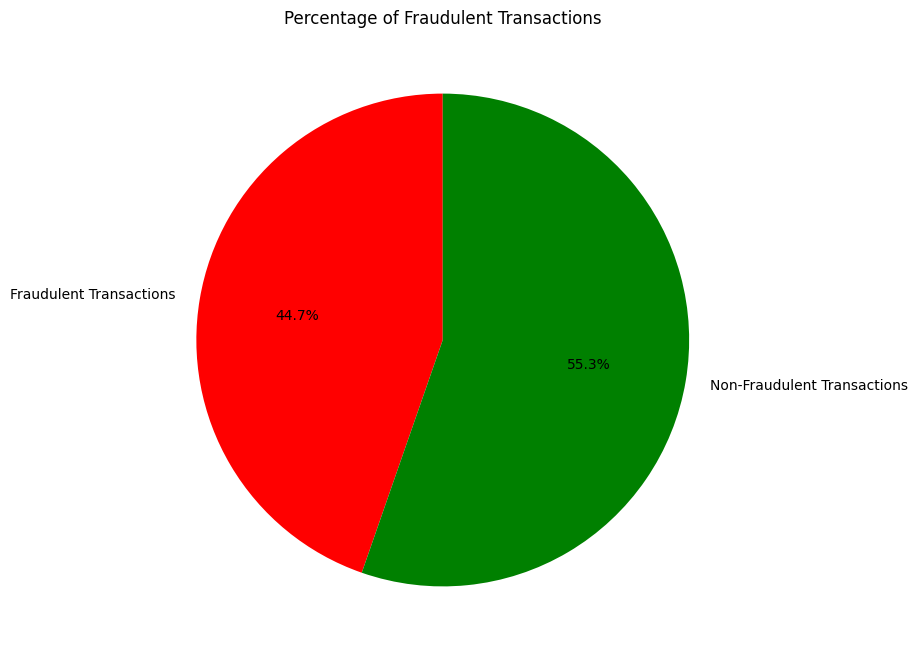

In [ ]:
total_transactions = len(y_test)
num_fraudulent_transactions = len(fraudulent_transactions)
fraud_percentage = (num_fraudulent_transactions / total_transactions) * 100
non_fraud_percentage = 100 - fraud_percentage

fraud_data = [fraud_percentage, non_fraud_percentage]
labels = ['Fraudulent Transactions', 'Non-Fraudulent Transactions']

plt.figure(figsize=(8, 8))
plt.pie(fraud_data, labels=labels, autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
plt.title('Percentage of Fraudulent Transactions')
plt.show()